In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas

from data_loader import data_label_split, normalize_by_group, generate_data_set, dmso_taxol_ProfileBag

from base_exp import train
from base_exp import multi_mini_noise_signal_cv

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import torch.utils.data as D

Load data

In [2]:
drop_NA_data=pd.read_csv("moa_data_drop_NA.csv", index_col=0)
X, y = data_label_split(drop_NA_data)
X['Metadata_PlateID_Nuclei'] = drop_NA_data['Metadata_PlateID_Nuclei'].tolist()

In [3]:
mini_data = pd.read_csv("mini_moa_data_drop_NA.csv", index_col = 0)

In [4]:
X = normalize_by_group(X,'Metadata_PlateID_Nuclei')
X.dropna('columns',inplace=True)
X['compound'] = drop_NA_data['compound'].tolist()

# Full features
## RandomForest Classification

In [5]:
# results,dic = multi_mini_noise_signal_cv(500,mini_data, "taxol", "DMSO", RandomForestClassifier(min_samples_split=50, random_state=0), 10, 0)
model = RandomForestClassifier(min_samples_split=50, random_state=0)
sample_size = 500
train(sample_size, X, model, 0)

K fold CV: 10it [00:03,  2.68it/s]
K fold CV: 10it [00:03,  2.57it/s]
K fold CV: 10it [00:03,  2.58it/s]
K fold CV: 10it [00:03,  2.60it/s]
K fold CV: 10it [00:03,  2.62it/s]
K fold CV: 10it [00:03,  2.60it/s]
K fold CV: 10it [00:03,  2.57it/s]
K fold CV: 10it [00:03,  2.58it/s]
K fold CV: 10it [00:04,  2.43it/s]
K fold CV: 10it [00:04,  2.42it/s]
K fold CV: 10it [00:04,  2.39it/s]
K fold CV: 10it [00:04,  2.38it/s]
K fold CV: 10it [00:04,  2.29it/s]
K fold CV: 10it [00:04,  2.28it/s]
K fold CV: 10it [00:04,  2.25it/s]
K fold CV: 10it [00:04,  2.21it/s]
K fold CV: 10it [00:04,  2.24it/s]
K fold CV: 10it [00:04,  2.30it/s]
K fold CV: 10it [00:04,  2.48it/s]


In [6]:
model_name = str(model).split("(")[0]
feature_size = len(data_label_split(X)[0].columns)
res = pd.read_csv("%s_sample%s_feature%s.csv" % (model_name, sample_size, feature_size), index_col=0)

In [ ]:
res

In [11]:
path = "./result_Nov14/"
file_name = "RandomForestClassifier_sample50000_feature481.csv"
table_list = ["RandomForestClassifier_sample50000_feature481.csv",
              "MLPClassifier_sample50000_feature481.csv",
             "KNeighborsClassifier_sample50000_feature481.csv",
             "LogisticRegression_sample50000_feature481.csv"]

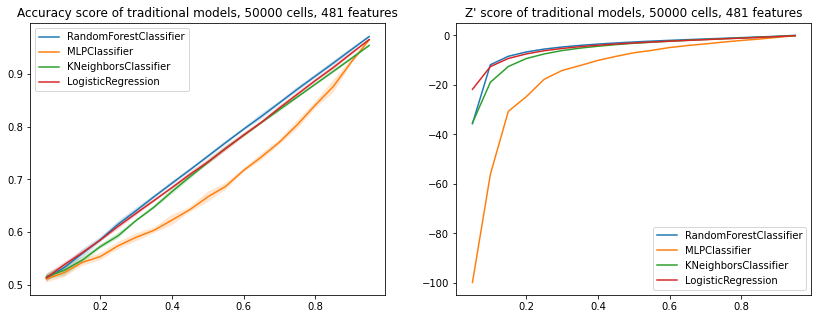

In [12]:
produce_fig(path,table_list, 'test.png')

In [9]:
def produce_fig(path, table_list, save_name):
    plt.figure(figsize=(14, 5))
    for i in table_list:
        table = pd.read_csv(path + i, index_col=0)
        table = table.sort_index()
        model_name = "_".join(i.split("_")[0:1])
        number_cell = "_".join(i.split("_")[1:2])[6:11]
        feature_size = 481 
        ax = plt.subplot(1,2,1)
        plt.plot(table.index, table["mean_accuracy"], '-',label = model_name)
        plt.fill_between(table.index, 
                     (table["mean_accuracy"])-table["std_accuracy"], table["mean_accuracy"]+table["std_accuracy"], alpha=0.2)
        ax.legend()

        ax.set_title("Accuracy score of traditional models, %s cells, %s features"%(number_cell, feature_size))

        ax = plt.subplot(1,2,2)
        z_score = 1-3*(table["std_pred_score_treatment"]+table["std_pred_score_control"])/(np.abs(table["mean_pred_score_treatment"]-table["mean_pred_score_control"]))
        plt.plot(table.index, z_score, '-', label = model_name)
        ax.set_title("Z' score of traditional models, %s cells, %s features"%(number_cell, feature_size))
        ax.legend()
    plt.savefig(save_name)

In [ ]:
plt.plot(res.index, res['mean_accuracy'], '-')
plt.fill_between(res.index, 
                 (res['mean_accuracy'])-res['std_accuracy'], res['mean_accuracy'] + res['std_accuracy'], alpha=0.2)
plt.title("taxol prediction score v.s. change of %taxol\n minibatch with size 500, Logistic Regression")


In [5]:
dic = multi_mini_noise_signal_cv(500,mini_data, "taxol", "DMSO", RandomForestClassifier(min_samples_split=50, random_state=0), 10, 0)

K fold CV: 10it [00:05,  1.90it/s]
K fold CV: 9it [00:05,  1.43it/s]]
K fold CV: 10it [00:05,  1.81it/s]
K fold CV: 10it [00:05,  1.98it/s]

K fold CV: 9it [00:06,  1.71it/s]
K fold CV: 10it [00:05,  1.76it/s]
K fold CV: 10it [00:06,  1.64it/s]
K fold CV: 10it [00:06,  1.54it/s]
K fold CV: 10it [00:06,  1.55it/s]
K fold CV: 10it [00:06,  1.47it/s]
K fold CV: 10it [00:06,  1.43it/s]
K fold CV: 10it [00:06,  1.46it/s]
K fold CV: 10it [00:07,  1.33it/s]
K fold CV: 10it [00:07,  1.34it/s]
K fold CV: 10it [00:07,  1.39it/s]
K fold CV: 10it [00:07,  1.35it/s]
K fold CV: 10it [00:07,  1.25it/s]
K fold CV: 10it [00:08,  1.13it/s]


In [8]:
pd.DataFrame.from_dict(dic, orient = 'index')

,0,1,2,3,4,5
0.05,0.510,0.099700,0.504816,0.067652,0.498951,0.060627
0.10,0.470,0.053852,0.497508,0.067198,0.507472,0.093925
0.15,0.478,0.045122,0.492043,0.077470,0.509132,0.121349
0.20,0.538,0.054736,0.483976,0.079624,0.529100,0.149325
0.25,0.530,0.058138,0.469254,0.082300,0.538132,0.183277
0.30,0.576,0.051225,0.463279,0.083025,0.556693,0.199668
0.35,0.604,0.041761,0.449233,0.089443,0.562516,0.214536
0.40,0.620,0.049800,0.437192,0.098789,0.573784,0.229918
0.45,0.620,0.045607,0.424998,0.113331,0.580572,0.245151
0.50,0.680,0.057966,0.407628,0.113583,0.609229,0.258133


In [5]:
lgr = LogisticRegression(max_iter = 10000, solver = "saga", n_jobs = -1)
# train(10000, drop_NA_data, lgr, 0)

In [6]:
# single feature
sf_drop_NA_data = mini_data[["compound", "concentration",
                                "moa", "row ID", "Iteration (#2)", "COND",
                               "AreaShape_Area_Nuclei"]]
lgr = LogisticRegression(max_iter = 10000, solver = "saga", n_jobs = -1)
# train(10000, sf_drop_NA_data, lgr, 0)

In [ ]:
# cost one hour to train with datasize 500

result1 = mini_noise_signal_cv(500, mini_data, "taxol", "DMSO", lgr, 10, 0)

 95%|█████████▍| 18/19 [52:49<03:13, 193.63s/it] 

In [7]:
(mean_mean_accuracy, std_mean_accuracy, 
 mean_pred_score_control, std_pred_score_control,
 mean_pred_score_treatment, std_pred_score_treatment) = result1

In [115]:
mean_z_score_control = np.array(mean_pred_score_control)
std_z_score_control = np.array(std_pred_score_control)
mean_z_score_treatment = np.array(mean_pred_score_treatment)
std_z_score_treatment = np.array(std_pred_score_treatment)

Text(0.5, 1.0, 'DMSO prediction score with change of %taxol')

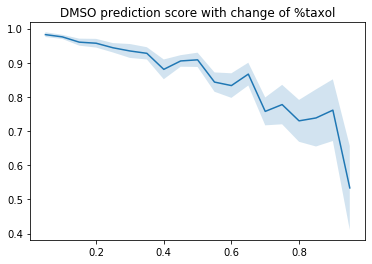

In [113]:
plt.plot([i/100 for i in range(5,96,5)], mean_z_score_control, '-')
plt.fill_between([i/100 for i in range(5,96,5)], 
                 (mean_z_score_control)-std_z_score_control, mean_z_score_control+std_z_score_control, alpha=0.2)
plt.title("DMSO prediction score with change of %taxol")

Text(0.5, 1.0, 'taxol prediction score v.s. change of %taxol\n minibatch with size 500, Logistic Regression')

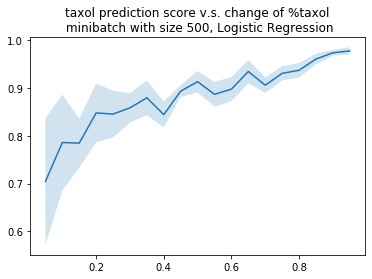

In [121]:
plt.plot([i/100 for i in range(5,96,5)], mean_z_score_treatment, '-')
plt.fill_between([i/100 for i in range(5,96,5)], 
                 (mean_z_score_treatment)-std_z_score_treatment, mean_z_score_treatment + std_z_score_treatment, alpha=0.2)
plt.title("taxol prediction score v.s. change of %taxol\n minibatch with size 500, Logistic Regression")


## RF

In [10]:
RF_model = KNeighborsClassifier(30)#RandomForestClassifier(min_samples_split=50, random_state=0)

In [ ]:
result1 = mini_noise_signal_cv(10000, drop_NA_data, "taxol", "DMSO", RF_model, 10, 0)

 11%|█         | 2/19 [08:09<1:09:19, 244.67s/it]

data loaded


K fold CV: 10it [00:56,  5.65s/it]
K fold CV: 10it [00:57,  5.75s/it]
K fold CV: 10it [00:55,  5.54s/it]
K fold CV: 10it [00:55,  5.54s/it]
K fold CV: 10it [00:55,  5.51s/it]
K fold CV: 10it [00:54,  5.43s/it]
K fold CV: 10it [00:54,  5.40s/it]
K fold CV: 10it [00:53,  5.33s/it]
K fold CV: 10it [00:52,  5.30s/it]
K fold CV: 10it [00:53,  5.40s/it]
K fold CV: 10it [00:54,  5.47s/it]
K fold CV: 10it [00:53,  5.36s/it]
K fold CV: 10it [00:52,  5.24s/it]
K fold CV: 10it [00:52,  5.23s/it]
K fold CV: 10it [00:50,  5.07s/it]
K fold CV: 10it [00:51,  5.14s/it]
K fold CV: 10it [00:50,  5.08s/it]
K fold CV: 10it [00:50,  5.10s/it]
K fold CV: 10it [00:48,  4.88s/it]


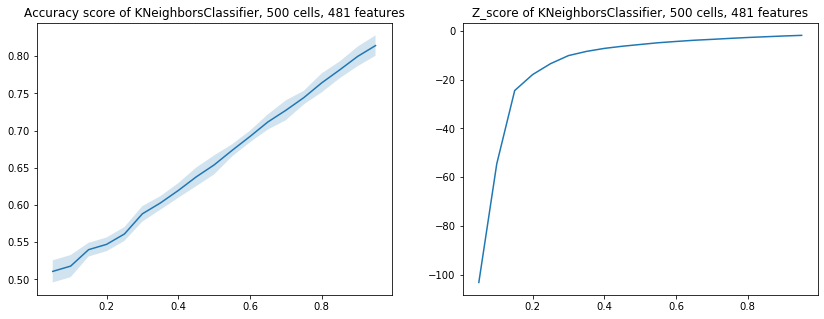

In [12]:
print("data loaded")
# train(10000, drop_NA_data, RF_model, 0)
train(10000, drop_NA_data, RF_model, 0)

In [ ]:
result1 = mini_noise_signal_cv(size, data, "taxol", "DMSO", model, 10, verbose, bag_perc)

In [14]:
result = mini_noise_signal_cv(500, mini_data, "taxol", "DMSO", RF_model, 10, 0) 

100%|██████████| 19/19 [01:57<00:00,  6.20s/it]


# Single features
## Logistic Regression

In [ ]:

#     mean_accuracy = np.array(mean_mean_accuracy)
#     std_accuracy = np.array(std_mean_accuracy)
#     mean_pred_score_control = np.array(mean_pred_score_control)
#     std_pred_score_control = np.array(std_pred_score_control)
#     mean_pred_score_treatment = np.array(mean_pred_score_treatment)
#     std_pred_score_treatment = np.array(std_pred_score_treatment)
    
#     z_score = 1-3*(std_pred_score_control+std_pred_score_treatment)/(np.abs(mean_pred_score_control-mean_pred_score_treatment))
    
#     model_name = str(model).split("(")[0]
#     feature_size = len(data_label_split(data)[0].columns)
    
#     plt.figure(figsize=(14, 5))
#     ax = plt.subplot(1,2,1)
#     plt.plot([i/100 for i in range(5,96,5)], mean_accuracy, '-')
#     plt.fill_between([i/100 for i in range(5,96,5)], 
#                      (mean_accuracy)-std_accuracy, mean_accuracy+std_accuracy, alpha=0.2)
#     ax.set_title("Accuracy score of %s, %s cells, %s features"%(model_name, 500, feature_size))

#     ax = plt.subplot(1,2,2)
#     plt.plot([i/100 for i in range(5,96,5)], z_score, '-')
#     ax.set_title("Z_score of %s, %s cells, %s features"%(model_name, 500, feature_size))

#     plt.savefig("%s_sample%s_feature%s.png" %(model_name, size, feature_size))

# Old

In [87]:
def mini_noise_signal(size, data, treatment, control, model):
    p_acc=[]
    n_acc=[]
    for i in range(5,96,5):
        mini_batch = generate_data_set(size, i/100, data, "taxol", "DMSO")
        X, y = data_label_split(mini_batch)
        y=y['compound']
        model.fit(X, y)
        y_pred = model.predict(X)
        cm = confusion_matrix(y,y_pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        n_acc.append(cm.diagonal()[0])
        p_acc.append(cm.diagonal()[1])
    return p_acc, n_acc

In [88]:
clf = RandomForestClassifier(min_samples_split=50, random_state=0)

In [89]:
p_, n_ = mini_noise_signal(1000, drop_NA_data, "taxol", "DMSO", clf)

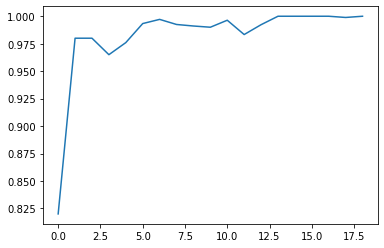

In [93]:
plt.plot(n_)

In [74]:
p_acc=[]
n_acc=[]
for i in range(5,96,5):
    mini_batch = generate_data_set(1000, i/100, drop_NA_data, "taxol", "DMSO")
    X, y = data_label_split(mini_batch)
    y=y['compound']
    
    clf = LogisticRegression(max_iter = 10000, solver = "saga")
    clf.fit(X, y)
    y_pred = clf.predict(X)
    cm = confusion_matrix(y,y_pred )
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_acc.append(cm.diagonal()[0])
    p_acc.append(cm.diagonal()[1])

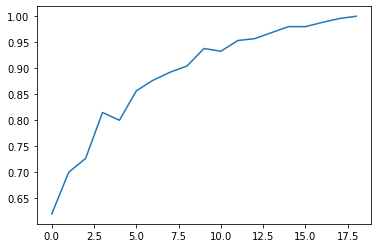

In [78]:
plt.plot(n_acc)

In [63]:

mini_batch = generate_data_set(100, 0.5, drop_NA_data, "taxol", "DMSO")
X, y = data_label_split(mini_batch)
lb = LabelEncoder()
# y = lb.fit_transform(y['compound'])
y=y['compound']

In [64]:
clf = LogisticRegression(max_iter = 10000, solver = "saga")
clf.fit(X, y)
y_pred = clf.predict(X)

In [65]:
cm = confusion_matrix(y,y_pred )

In [66]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [73]:
cm.diagonal()[0]

0.88

In [68]:
confusion_matrix(y,y_pred )

array([[44,  6],
       [ 2, 48]])

Text(0.5, 0, 'percent of taxol')

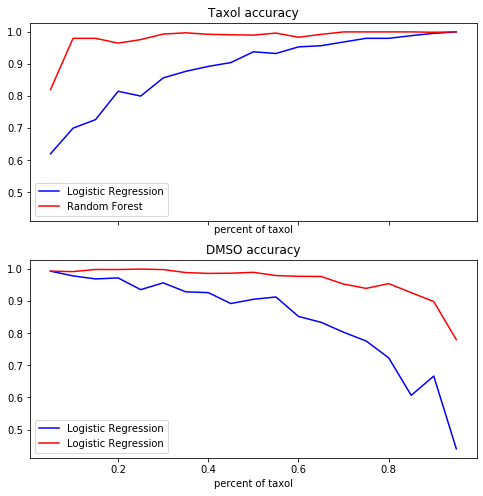

In [112]:
fig, ax = plt.subplots(2, sharex=True, sharey=True,figsize=(8, 8))
l1 = ax[0].plot([i/100 for i in range(5,96,5)], n_acc, color = 'b', label = "Logistic Regression")
l2 = ax[0].plot([i/100 for i in range(5,96,5)], n_, color = 'r', label = "Random Forest")
ax[0].legend()
ax[0].title.set_text("Taxol accuracy")
ax[0].set_xlabel('percent of taxol')
l3 = ax[1].plot([i/100 for i in range(5,96,5)], p_acc, color = 'b',label = "Logistic Regression")
l4 = ax[1].plot([i/100 for i in range(5,96,5)], p_, color = 'r',label = "Logistic Regression")
ax[1].legend()
ax[1].title.set_text("DMSO accuracy")
ax[1].set_xlabel('percent of taxol')